In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import folium

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor 

from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn-v0_8')

In [38]:
df = pd.read_csv('detailed_ev_charging_stations.csv')

In [40]:
#Basic information
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station ID                   5000 non-null   object 
 1   Latitude                     5000 non-null   float64
 2   Longitude                    5000 non-null   float64
 3   Address                      5000 non-null   object 
 4   Charger Type                 5000 non-null   object 
 5   Cost (USD/kWh)               5000 non-null   float64
 6   Availability                 5000 non-null   object 
 7   Distance to City (km)        5000 non-null   float64
 8   Usage Stats (avg users/day)  5000 non-null   int64  
 9   Station Operator             5000 non-null   object 
 10  Charging Capacity (kW)       5000 non-null   int64  
 11  Connector Types              5000 non-null   object 
 12  Installation Year            5000 non-null   int64  
 13  Rene

In [42]:
#Basic numerical statistics
print("\nNumerical Statistics:")
print(df.describe())


Numerical Statistics:
          Latitude    Longitude  Cost (USD/kWh)  Distance to City (km)  \
count  5000.000000  5000.000000     5000.000000            5000.000000   
mean     19.942607     8.833487        0.300196              10.201810   
std      32.315818    93.724046        0.115733               5.608316   
min     -89.680850  -178.870028        0.100000               0.500000   
25%      13.758953   -87.680319        0.200000               5.430000   
50%      34.029053    18.495233        0.300000              10.190000   
75%      41.840249   100.454629        0.400000              14.902500   
max      89.464534   179.664661        0.500000              20.000000   

       Usage Stats (avg users/day)  Charging Capacity (kW)  Installation Year  \
count                  5000.000000             5000.000000        5000.000000   
mean                     55.453800              144.272000        2016.569400   
std                      26.494986              128.370674         

In [44]:
#Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Station ID                     0
Latitude                       0
Longitude                      0
Address                        0
Charger Type                   0
Cost (USD/kWh)                 0
Availability                   0
Distance to City (km)          0
Usage Stats (avg users/day)    0
Station Operator               0
Charging Capacity (kW)         0
Connector Types                0
Installation Year              0
Renewable Energy Source        0
Reviews (Rating)               0
Parking Spots                  0
Maintenance Frequency          0
dtype: int64


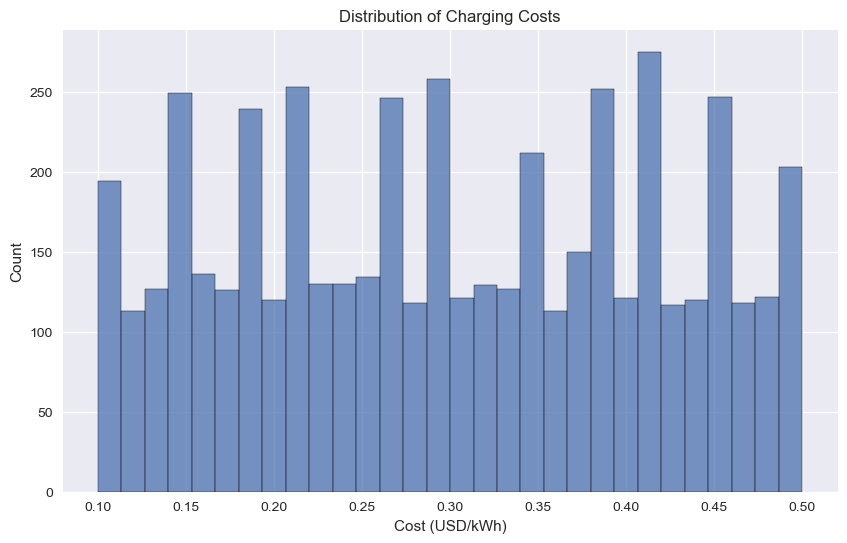

In [46]:
# Distribution of charging costs
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Cost (USD/kWh)', bins=30)
plt.title('Distribution of Charging Costs')
plt.xlabel('Cost (USD/kWh)')
plt.show()

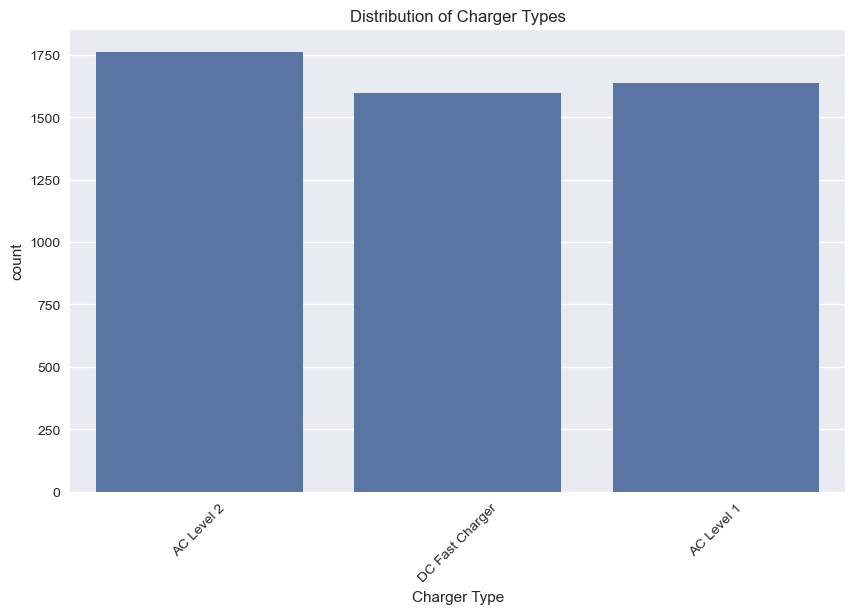

In [50]:
#Distribution of charger types
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Charger Type')
plt.title('Distribution of Charger Types')
plt.xticks(rotation=45)
plt.show()